# Chapter 10

#### Image Measurements

##### Labeling
### i try this labeling method with my images

221.5443462013909 202.88189444481142
425.0 220.5


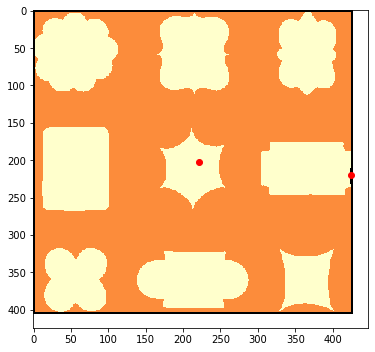

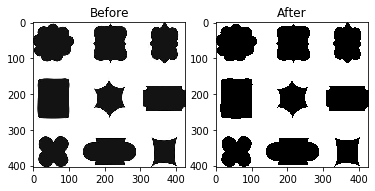

In [2]:
import numpy
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.morphology  import label
from skimage.measure import regionprops
from skimage.filters.thresholding import threshold_otsu
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
a = Image.open('../Figures/all.jpg').convert('L')
# a is converted to an ndarray.
a = numpy.asarray(a)
# Threshold value is determined by
# using Otsu's method.
thresh = threshold_otsu(a)
# The pixels with intensity greater than
# "theshold" are kept.
b = a > thresh
# Labelling is performed on b.
c = label(b)
# c is saved as label_output.png
cv2.imwrite('../Figures/label_output.png', c)
# On the labelled image c, regionprops is performed
d = regionprops(c)
# the following command creates an empty plot of
# dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1,nrows=1,
          figsize=(6, 6))
# plots the label image on the
# previous plot using colormap
ax.imshow(c, cmap='YlOrRd')

for i in d:
    # Printing the x and y values of the
    # centroid where centroid[1] is the x value
    # and centroid[0] is the y value.
    print(i.centroid[1], i.centroid[0])
    # Plot a red circle at the centroid, ro stands
    # for red.
    plt.plot(i.centroid[1],i.centroid[0],'ro')
    # In the bounding box, (lr,lc) are the
    # co-ordinates of the lower left corner and
    # (ur,uc) are the co-ordinates
    # of the top right corner.
    lr, lc, ur, uc = i.bbox
    # The width and the height of the bounding box
    # is computed.
    rec_width = uc - lc
    rec_height = ur - lr

    # Rectangular boxes with
	# origin at (lr,lc) are drawn.
    rect = mpatches.Rectangle((lc, lr),rec_width,
           rec_height,fill=False,edgecolor='black',
           linewidth=2)
    # This adds the rectangular boxes to the plot.
    ax.add_patch(rect)
# Saving the figure
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('After')
plt.show()

#### Hough Line

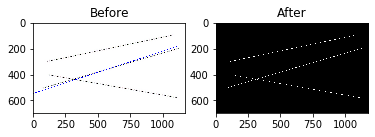

[[[ 520.           1.2566371]]

 [[ 380.           1.727876 ]]

 [[ 280.           1.4137168]]

 [[ 240.           1.8849556]]

 [[ 440.           1.4137168]]

 [[ 560.           1.0995574]]

 [[ 400.           1.2566371]]

 [[ 340.           1.2566371]]

 [[ 300.           1.8849556]]

 [[ 240.           1.5707964]]

 [[ 620.           1.0995574]]

 [[ 700.           0.9424778]]

 [[  60.           2.0420353]]

 [[ 140.           2.0420353]]

 [[ 100.           2.0420353]]

 [[ 780.           0.7853982]]

 [[ 420.           0.7853982]]

 [[  40.           1.727876 ]]

 [[ 140.           1.727876 ]]

 [[  80.           1.727876 ]]

 [[-120.           2.1991148]]

 [[   0.           2.1991148]]

 [[ -60.           2.1991148]]]


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Opening the image.
im = cv2.imread('../Figures/hlines.png')
# Converting the image to grayscale.
a1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# Thresholding the image to obtain 
# only foreground pixels.
thresh, b1 = cv2.threshold(a1, 0, 255,
            cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

cv2.imwrite('../Figures/hlines_thresh.png', b1)
# Performing the Hough lines transform.
lines = cv2.HoughLines(b1, 20, np.pi/20, 200)
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(im,(x1,y1),(x2,y2),(0,0,255),2)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(im, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(b1, cmap='gray')
ax.set_title('After')
plt.show()

# Printing the lines: distance and angle in radians.
print(lines)

#### Hough Circle

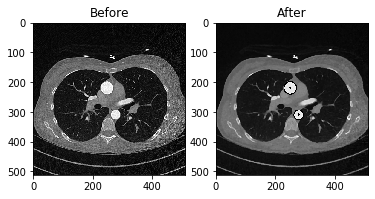

In [6]:
import numpy as np
import scipy.ndimage
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# opening the image and converting it to grayscale
a = Image.open('../Figures/withcontrast1.png')
a = a.convert('L')
# Median filter is performed on the
# image to remove noise.
img = scipy.ndimage.filters.median_filter(a,size=5)
# Circles are determined using
# Hough circles transform.
circles = cv2.HoughCircles(img,
          cv2.HOUGH_GRADIENT,1,10,param1=100,
          param2=30,minRadius=10,maxRadius=30)
# circles image is rounded to unsigned integer 16.
circles = np.uint16(np.around(circles))
# For each detected circle.
for i in circles[0,:]:
	# An outer circle is drawn for visualization.
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
	# its center is marked
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
# Saving the image as houghcircles_output.png
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img, cmap='gray')
ax.set_title('After')
plt.show()

#### Template Matching

The number of seats are: 261


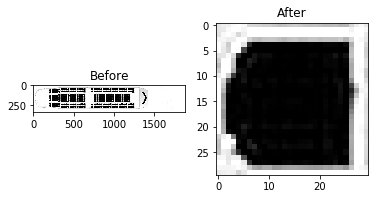

In [7]:
import cv2
import numpy
from PIL import Image
from skimage.morphology  import label
from skimage.measure import regionprops
from skimage.feature import match_template
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
image = Image.open('../Figures/airline_seating.png')
image = image.convert('L')
# Converting the input image into an ndarray.
image = numpy.asarray(image)
# Reading the template image.
temp = Image.open('../Figures/template1.png')
temp = temp.convert('L')
# Converting the template into an ndarray.
temp = numpy.asarray(temp)
# Performing template matching.
result = match_template(image, temp)
thresh = 0.7
# Thresholding the result from template
# matching considering pixel values where the
# normalized cross-correlation is greater than 0.7.
res = result > thresh
# Labeling the thresholded image.
c = label(res, background=0)
# Performing regionprops to count the
# number of label.
reprop = regionprops(c)
print("The number of seats are:", len(reprop))
# Converting the binary image to an 8-bit for storing.
res = res*255
# Converting the ndarray to image.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(temp, cmap='gray')
ax.set_title('After')
plt.show()

#### FAST Corner Detector

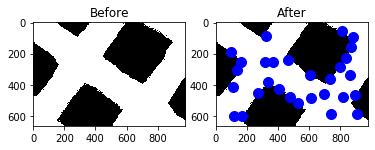

In [8]:
import numpy as np
from PIL import Image
from skimage.feature import corner_peaks
from skimage.feature import corner_subpix, corner_fast
from matplotlib import pyplot as plt

# Image is opened and is converted to grayscale.
img = Image.open('../Figures/corner_detector.png').convert('L')
# img is converted to an ndarray.
img1 = np.asarray(img)

corner_response = corner_fast(img1)
cpv = corner_peaks(corner_response, min_distance=50)
corners_subpix_val = corner_subpix(img1, cpv, window_size=13)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img1, cmap='gray')
ax.set_title('After')
x = corners_subpix_val[:, 1]
y = corners_subpix_val[:, 0]
ax.plot(x, y, 'ob', markersize=10)
plt.show()

#### Harris Corner Detector

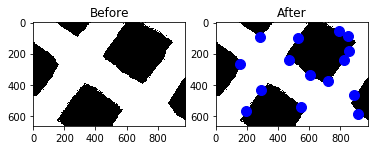

In [9]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage.feature import corner_harris
from skimage.feature import corner_peaks, corner_subpix

# Opening image and converting it into grayscale.
img = Image.open('../Figures/corner_detector.png').convert('L')
# img is converted to an ndarray.
img1 = np.asarray(img)

# Detecting corners using Harris.
corner_response = corner_harris(img1, k=0.2)
# Detecting peak values.
corners_peak_val = corner_peaks(corner_response, 50)

corners_subpix_val = corner_subpix(img1, corners_peak_val, 13)
# Defining a subplot.
# Displaying the image.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img1, cmap='gray')
ax.set_title('After')
x = corners_subpix_val[:, 1]
y = corners_subpix_val[:, 0]
ax.plot(x, y, 'ob', markersize=10)
plt.show()